# Hotel Data Analysis
##### This notebook explores Saudi Arabia hotels from Booking.com. We will use the [following dataset](https://www.kaggle.com/datasets/moayadmagadmi/saudi-arabia-bookingcom)s.


## Part 1: EDA

In [139]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv("vis_data.csv")
df.rename(columns = {'Canelation': 'Cancelation'}, inplace = True)
df.head()

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Cancelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Breakfst_included,Longitude_x,Latitude_y,Link
0,0,الريـم,Al Ula,SAR 179,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Double Room,...,FREE cancellation,Max persons: 2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,NaN,Reservation possible without a credit card,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,SAR 195,5,Only 2 rooms like this left on our site,5326174,9.0,169 reviews,Deluxe Room (2 Adults + 1 Child),...,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,Reservation possible without a credit card,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,2,فندق راية الشلال 2,Abū Qa‘ar,SAR 200,5,Only 3 rooms like this left on our site,5987844,8.7,17 reviews,Deluxe Double or Twin Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,3,Four Points by Sheraton Makkah Al Naseem,Makkah,SAR 225,5,Only 5 rooms like this left on our site,3889445,8.7,"9,418 reviews",Superior Twin Room,...,FREE cancellation,Max persons: 2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,NaN,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...
4,4,نزل الثريا للوحدات السكنية,Taif,SAR 250,5,NaN,6284346,NaN,NaN,Budget Double Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),includes taxes and charges,NaN,Reservation possible without a credit card,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...


In [141]:
#types of df
df.dtypes

Unnamed: 0                int64
Name                     object
City                     object
Price                    object
Star_Rating               int64
Property_Demand          object
Property_id               int64
Customers_Rating        float64
Customers_Review         object
Type_of_room             object
reservations_Payment     object
Cancelation              object
Max_persons              object
Bed_type                 object
Tax                      object
Review_title             object
Credit_card              object
Breakfst_included        object
Longitude_x             float64
Latitude_y              float64
Link                     object
dtype: object

In [142]:
df.duplicated().sum()
#there are no duplicated rows in the df

0

In [143]:
#removing SAR from price to change it to float
df["Price"] = df["Price"].apply(lambda x: str(x).replace('SAR', '')).apply(lambda x: str(x).replace(',', '')).astype(int)
df.head()

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Cancelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Breakfst_included,Longitude_x,Latitude_y,Link
0,0,الريـم,Al Ula,179,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Double Room,...,FREE cancellation,Max persons: 2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,NaN,Reservation possible without a credit card,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,195,5,Only 2 rooms like this left on our site,5326174,9.0,169 reviews,Deluxe Room (2 Adults + 1 Child),...,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,Reservation possible without a credit card,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,2,فندق راية الشلال 2,Abū Qa‘ar,200,5,Only 3 rooms like this left on our site,5987844,8.7,17 reviews,Deluxe Double or Twin Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,3,Four Points by Sheraton Makkah Al Naseem,Makkah,225,5,Only 5 rooms like this left on our site,3889445,8.7,"9,418 reviews",Superior Twin Room,...,FREE cancellation,Max persons: 2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,NaN,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...
4,4,نزل الثريا للوحدات السكنية,Taif,250,5,NaN,6284346,NaN,NaN,Budget Double Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),includes taxes and charges,NaN,Reservation possible without a credit card,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...


In [144]:
#get number of max. persons and customer review
df["Max_persons"] = df["Max_persons"].apply(lambda x: str(x).replace('Max persons: ', '')).astype(int)
df["Customers_Review"] = df["Customers_Review"].apply(lambda x: str(x).replace('reviews', '').replace(',', '') if not pd.isnull(x) else np.nan)
df.head()

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Cancelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Breakfst_included,Longitude_x,Latitude_y,Link
0,0,الريـم,Al Ula,179,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Double Room,...,FREE cancellation,2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,NaN,Reservation possible without a credit card,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,195,5,Only 2 rooms like this left on our site,5326174,9.0,169,Deluxe Room (2 Adults + 1 Child),...,FREE cancellation,2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,Reservation possible without a credit card,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,2,فندق راية الشلال 2,Abū Qa‘ar,200,5,Only 3 rooms like this left on our site,5987844,8.7,17,Deluxe Double or Twin Room,...,FREE cancellation,2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,3,Four Points by Sheraton Makkah Al Naseem,Makkah,225,5,Only 5 rooms like this left on our site,3889445,8.7,9418,Superior Twin Room,...,FREE cancellation,2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,NaN,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...
4,4,نزل الثريا للوحدات السكنية,Taif,250,5,NaN,6284346,NaN,NaN,Budget Double Room,...,FREE cancellation,2,1 bed\n(1 double),includes taxes and charges,NaN,Reservation possible without a credit card,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...


In [145]:
#if there is no credit card needed-> True, otherwise False
df["Credit_card"] = df["Credit_card"].apply(lambda x: str(x).replace("Reservation possible without a credit card", '1') if not pd.isnull(x) else '0').astype(bool)
df.rename(columns = {'Credit_card': 'reservation_without_card'}, inplace = True)
df.head()

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Cancelation,Max_persons,Bed_type,Tax,Review_title,reservation_without_card,Breakfst_included,Longitude_x,Latitude_y,Link
0,0,الريـم,Al Ula,179,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Double Room,...,FREE cancellation,2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,NaN,True,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,195,5,Only 2 rooms like this left on our site,5326174,9.0,169,Deluxe Room (2 Adults + 1 Child),...,FREE cancellation,2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,True,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,2,فندق راية الشلال 2,Abū Qa‘ar,200,5,Only 3 rooms like this left on our site,5987844,8.7,17,Deluxe Double or Twin Room,...,FREE cancellation,2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,True,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,3,Four Points by Sheraton Makkah Al Naseem,Makkah,225,5,Only 5 rooms like this left on our site,3889445,8.7,9418,Superior Twin Room,...,FREE cancellation,2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,True,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...
4,4,نزل الثريا للوحدات السكنية,Taif,250,5,NaN,6284346,NaN,NaN,Budget Double Room,...,FREE cancellation,2,1 bed\n(1 double),includes taxes and charges,NaN,True,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...


In [146]:
#if there is free cancellation possible -> True
# if there is no prepayment needed -> True
df["Cancelation"] = df["Cancelation"].apply(lambda x: str(x).replace('FREE cancellation', '1') if not pd.isnull(x) else 0).astype(bool)
df["reservations_Payment"] = df["reservations_Payment"].apply(lambda x: str(x).replace("No prepayment needed", '1') if not pd.isnull(x) else 0).astype(bool)
df.rename(columns = {"reservations_Payment" : "no_prepayment"}, inplace = True)
df.head()

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Cancelation,Max_persons,Bed_type,Tax,Review_title,reservation_without_card,Breakfst_included,Longitude_x,Latitude_y,Link
0,0,الريـم,Al Ula,179,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Double Room,...,True,2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,NaN,True,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,195,5,Only 2 rooms like this left on our site,5326174,9.0,169,Deluxe Room (2 Adults + 1 Child),...,True,2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,True,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,2,فندق راية الشلال 2,Abū Qa‘ar,200,5,Only 3 rooms like this left on our site,5987844,8.7,17,Deluxe Double or Twin Room,...,True,2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,True,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,3,Four Points by Sheraton Makkah Al Naseem,Makkah,225,5,Only 5 rooms like this left on our site,3889445,8.7,9418,Superior Twin Room,...,True,2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,True,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...
4,4,نزل الثريا للوحدات السكنية,Taif,250,5,NaN,6284346,NaN,NaN,Budget Double Room,...,True,2,1 bed\n(1 double),includes taxes and charges,NaN,True,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...


In [147]:
# create 2 new columns containing number of beds and types of beds
df[['num_beds', 'bed_type']] = df['Bed_type'].str.split(' ', n=1, expand=True)
df["num_beds"] = df["num_beds"].astype(float)
df


,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Bed_type,Tax,Review_title,reservation_without_card,Breakfst_included,Longitude_x,Latitude_y,Link,num_beds,bed_type
0,0,الريـم,Al Ula,179,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Double Room,...,3 beds\n(3 large doubles),+SAR 0 taxes and charges,NaN,True,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...,3.0,beds\n(3 large doubles)
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,195,5,Only 2 rooms like this left on our site,5326174,9.0,169,Deluxe Room (2 Adults + 1 Child),...,1 bed\n(1 extra-large double),includes taxes and charges,Superb,True,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...,1.0,bed\n(1 extra-large double)
2,2,فندق راية الشلال 2,Abū Qa‘ar,200,5,Only 3 rooms like this left on our site,5987844,8.7,17,Deluxe Double or Twin Room,...,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,True,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...,1.0,bed\n(1 double)
3,3,Four Points by Sheraton Makkah Al Naseem,Makkah,225,5,Only 5 rooms like this left on our site,3889445,8.7,9418,Superior Twin Room,...,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,True,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...,2.0,beds\n(2 singles)
4,4,نزل الثريا للوحدات السكنية,Taif,250,5,NaN,6284346,NaN,NaN,Budget Double Room,...,1 bed\n(1 double),includes taxes and charges,NaN,True,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...,1.0,bed\n(1 double)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,Al Corniche Hotel Suites & Villas,Hail,133,0,Only 5 like this left on our site,737295,7.5,193,Twin Room,...,2 beds\n(2 singles),includes taxes and charges,Good,True,NaN,41.691796,27.469497,https://www.booking.com/hotel/sa/ossuuuo-uuo-u...,2.0,beds\n(2 singles)
1021,1021,Golden Tower Hotel,Al Jubail,134,0,NaN,3418383,7.2,421,Deluxe Double Room (2 Adults + 1 Child),...,1 bed\n(1 double),+SAR 10 taxes and charges,Good,True,NaN,49.656744,26.989869,https://www.booking.com/hotel/sa/golden-tower....,1.0,bed\n(1 double)
1022,1022,Drr Ramah Suites 2,Riyadh,134,0,Only 3 like this left on our site,371101,6.5,194,King Studio,...,1 bed\n(1 double),+SAR 7 taxes and charges,Review score,True,NaN,46.668347,24.765365,https://www.booking.com/hotel/sa/dorrar-ramah....,1.0,bed\n(1 double)
1023,1023,Taj Al Khaleej Furnished Units 2,Ţurayf,135,0,Only 1 left like this on our site,3445586,8.9,122,Deluxe Apartment,...,1 bed\n(1 extra-large double),+SAR 0 taxes and charges,Fabulous,True,NaN,38.671166,31.655781,https://www.booking.com/hotel/sa/tj-lkhlyj-llw...,1.0,bed\n(1 extra-large double)


In [148]:
df['bed_type'] = df['bed_type'].str.split('\(', n=1).str[-1]
df['bed_type'] = df['bed_type'].str.replace('\)', '', regex=True)
df.drop(columns = 'Bed_type', inplace=True)
df.head()

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Max_persons,Tax,Review_title,reservation_without_card,Breakfst_included,Longitude_x,Latitude_y,Link,num_beds,bed_type
0,0,الريـم,Al Ula,179,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Double Room,...,2,+SAR 0 taxes and charges,NaN,True,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...,3.0,3 large doubles
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,195,5,Only 2 rooms like this left on our site,5326174,9.0,169,Deluxe Room (2 Adults + 1 Child),...,2,includes taxes and charges,Superb,True,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...,1.0,1 extra-large double
2,2,فندق راية الشلال 2,Abū Qa‘ar,200,5,Only 3 rooms like this left on our site,5987844,8.7,17,Deluxe Double or Twin Room,...,2,+SAR 0 taxes and charges,Fabulous,True,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...,1.0,1 double
3,3,Four Points by Sheraton Makkah Al Naseem,Makkah,225,5,Only 5 rooms like this left on our site,3889445,8.7,9418,Superior Twin Room,...,2,+SAR 23 taxes and charges,Fabulous,True,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...,2.0,2 singles
4,4,نزل الثريا للوحدات السكنية,Taif,250,5,NaN,6284346,NaN,NaN,Budget Double Room,...,2,includes taxes and charges,NaN,True,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...,1.0,1 double


In [149]:
# drop unnessesary columns
df.drop(columns = ['Unnamed: 0', "Breakfst_included", "Property_Demand"], inplace = True)
df.head()

,Name,City,Price,Star_Rating,Property_id,Customers_Rating,Customers_Review,Type_of_room,no_prepayment,Cancelation,Max_persons,Tax,Review_title,reservation_without_card,Longitude_x,Latitude_y,Link,num_beds,bed_type
0,الريـم,Al Ula,179,5,6330099,NaN,NaN,Economy Double Room,True,True,2,+SAR 0 taxes and charges,NaN,True,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...,3.0,3 large doubles
1,Copper Crown Furnished Apartments,Khamis Mushayt,195,5,5326174,9.0,169,Deluxe Room (2 Adults + 1 Child),True,True,2,includes taxes and charges,Superb,True,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...,1.0,1 extra-large double
2,فندق راية الشلال 2,Abū Qa‘ar,200,5,5987844,8.7,17,Deluxe Double or Twin Room,True,True,2,+SAR 0 taxes and charges,Fabulous,True,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...,1.0,1 double
3,Four Points by Sheraton Makkah Al Naseem,Makkah,225,5,3889445,8.7,9418,Superior Twin Room,False,True,2,+SAR 23 taxes and charges,Fabulous,True,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...,2.0,2 singles
4,نزل الثريا للوحدات السكنية,Taif,250,5,6284346,NaN,NaN,Budget Double Room,True,True,2,includes taxes and charges,NaN,True,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...,1.0,1 double


In [150]:
#check types once again
df.dtypes

Name                         object
City                         object
Price                         int32
Star_Rating                   int64
Property_id                   int64
Customers_Rating            float64
Customers_Review             object
Type_of_room                 object
no_prepayment                  bool
Cancelation                    bool
Max_persons                   int32
Tax                          object
Review_title                 object
reservation_without_card       bool
Longitude_x                 float64
Latitude_y                  float64
Link                         object
num_beds                    float64
bed_type                     object
dtype: object

In [151]:
def get_taxes(column):
    taxes=[]
    for i in column:
        if "+SAR" in i:
            taxes.append(float(i[1]))
        elif "includes" in i:
            taxes.append(0)
        else:
            taxes.append(np.nan)
    return taxes

In [152]:
df['Tax'] = get_taxes(df["Tax"].str.split().to_list())


In [153]:
df.head()

,Name,City,Price,Star_Rating,Property_id,Customers_Rating,Customers_Review,Type_of_room,no_prepayment,Cancelation,Max_persons,Tax,Review_title,reservation_without_card,Longitude_x,Latitude_y,Link,num_beds,bed_type
0,الريـم,Al Ula,179,5,6330099,NaN,NaN,Economy Double Room,True,True,2,0.0,NaN,True,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...,3.0,3 large doubles
1,Copper Crown Furnished Apartments,Khamis Mushayt,195,5,5326174,9.0,169,Deluxe Room (2 Adults + 1 Child),True,True,2,0.0,Superb,True,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...,1.0,1 extra-large double
2,فندق راية الشلال 2,Abū Qa‘ar,200,5,5987844,8.7,17,Deluxe Double or Twin Room,True,True,2,0.0,Fabulous,True,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...,1.0,1 double
3,Four Points by Sheraton Makkah Al Naseem,Makkah,225,5,3889445,8.7,9418,Superior Twin Room,False,True,2,23.0,Fabulous,True,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...,2.0,2 singles
4,نزل الثريا للوحدات السكنية,Taif,250,5,6284346,NaN,NaN,Budget Double Room,True,True,2,0.0,NaN,True,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...,1.0,1 double


In [154]:
#missing values detection

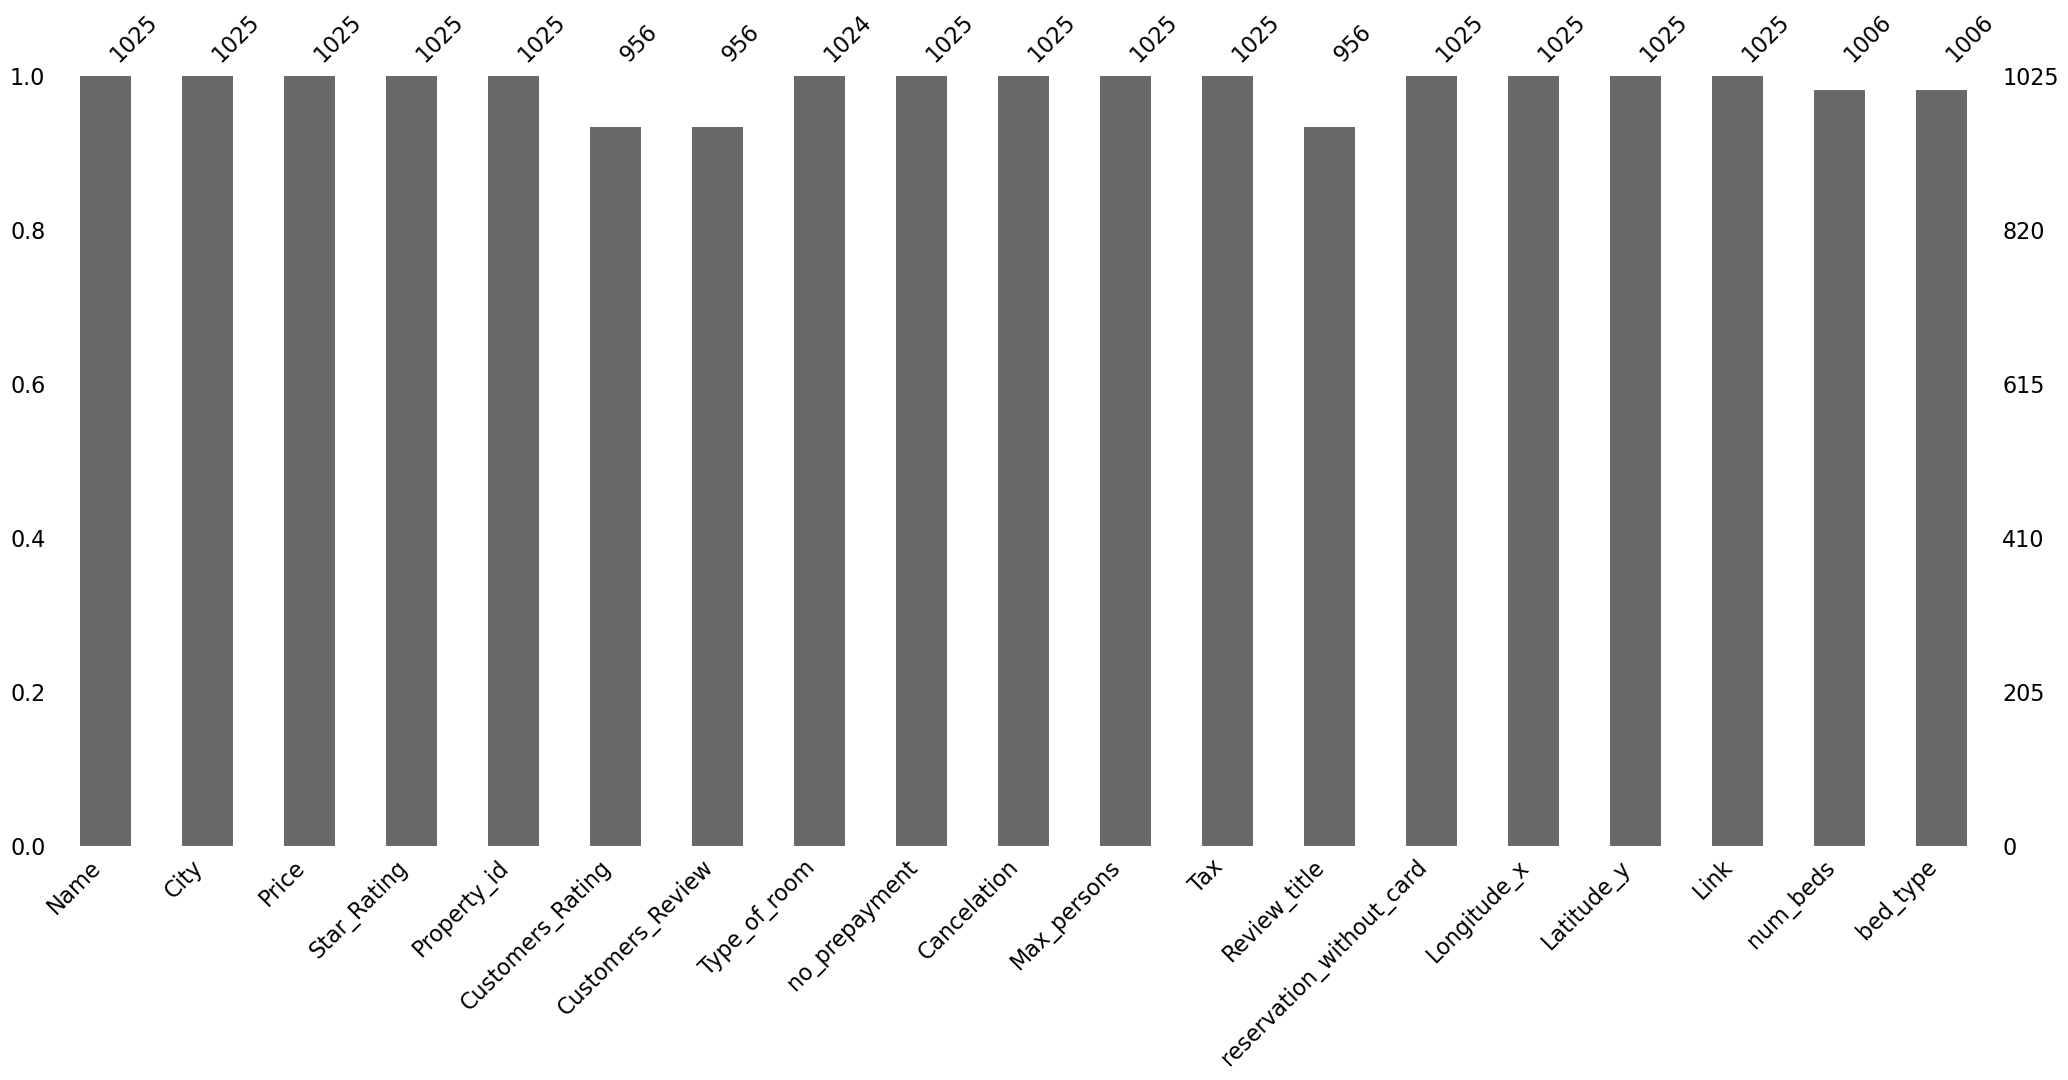

In [155]:
missingno.bar(df)
plt.show()

<Axes: >

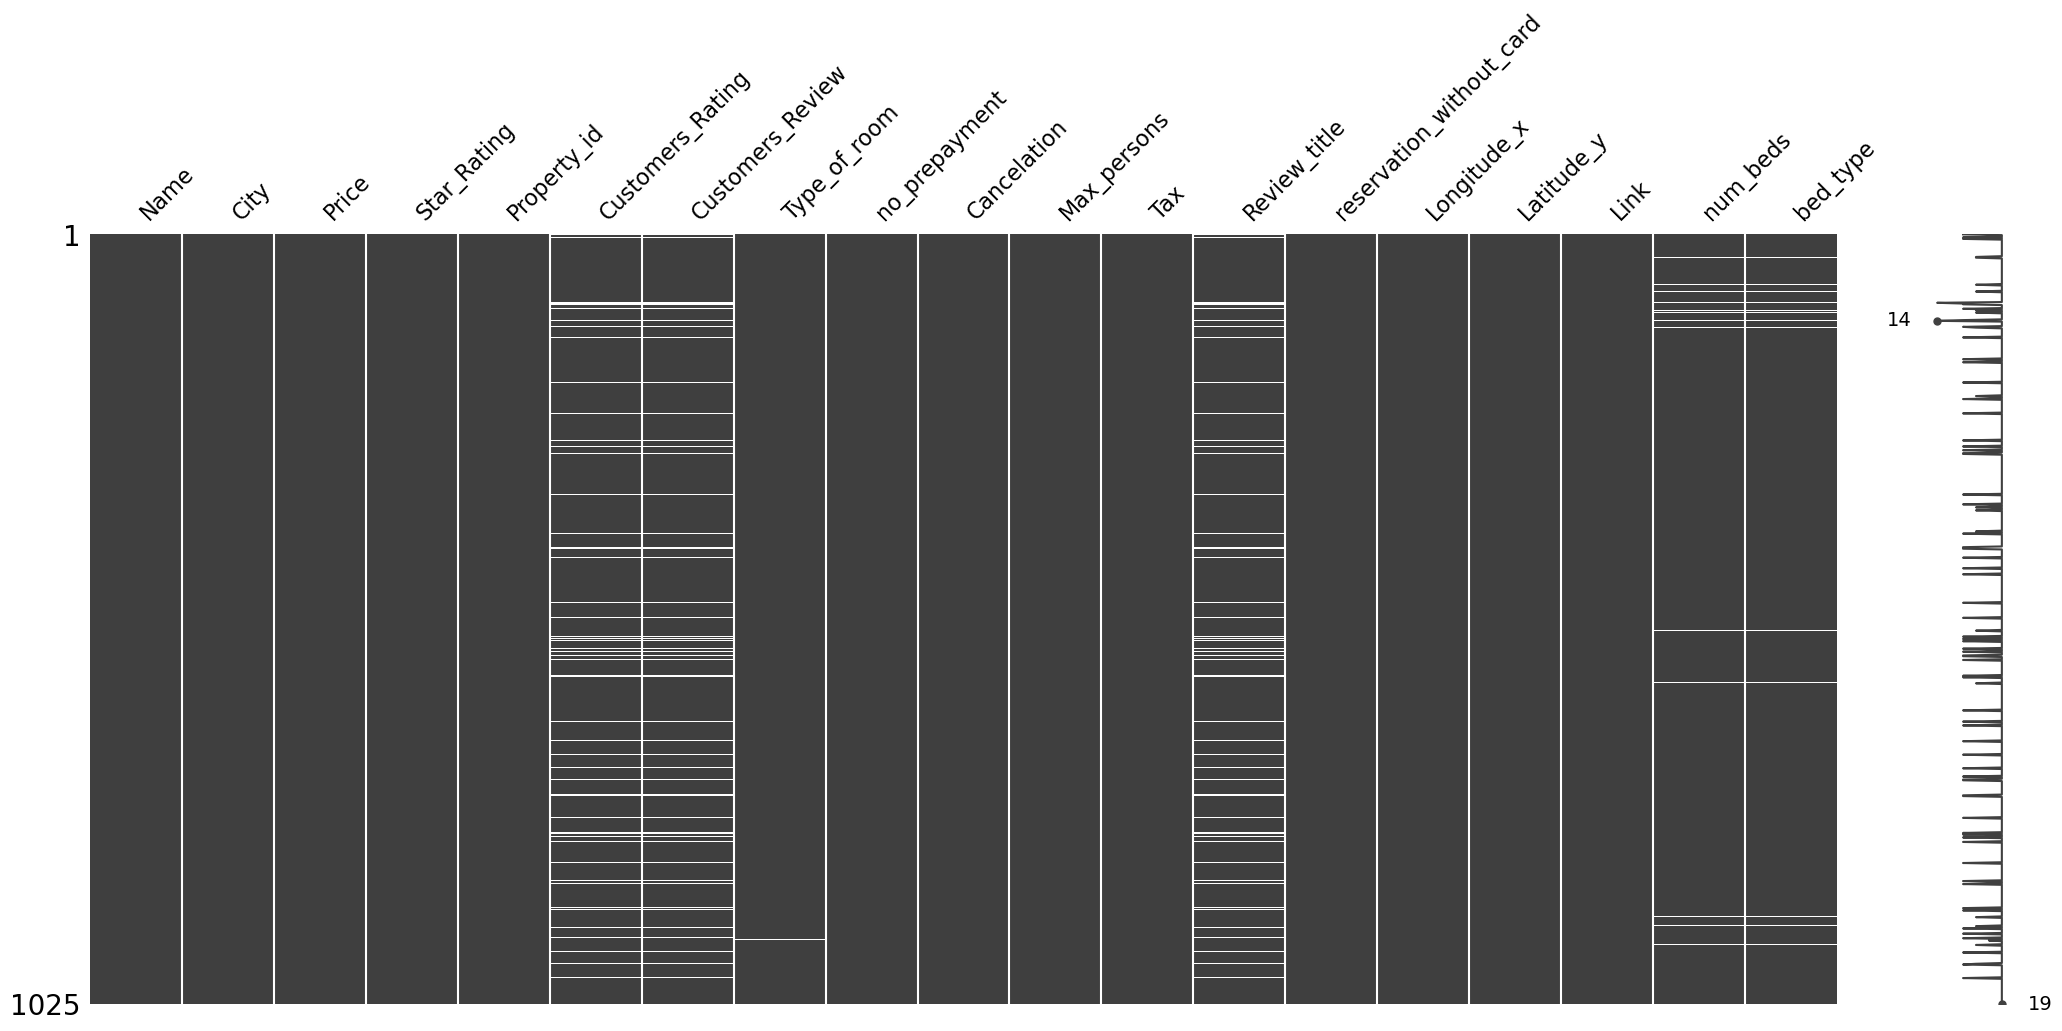

In [156]:
missingno.matrix(df)



In [157]:
#missing customer rating, customer reviews and review titles are correlated


In [158]:
df.describe()

,Price,Star_Rating,Property_id,Customers_Rating,Max_persons,Tax,Longitude_x,Latitude_y,num_beds
count,1025.000000,1025.000000,1.025000e+03,956.000000,1025.000000,1025.000000,1025.000000,1025.000000,1006.000000
mean,268.936585,1.707317,2.932536e+06,7.394979,2.286829,19.802927,43.330090,23.403023,1.649105
std,451.288977,1.884920,1.974138e+06,1.065163,1.107358,42.045922,4.310628,2.941714,1.530822
min,23.000000,0.000000,2.530900e+04,3.400000,1.000000,0.000000,35.005600,16.848112,1.000000
25%,100.000000,0.000000,1.370200e+06,6.700000,2.000000,4.000000,39.214104,21.464557,1.000000
50%,130.000000,0.000000,2.320250e+06,7.500000,2.000000,8.000000,42.541455,24.159421,1.000000
75%,280.000000,3.000000,4.766370e+06,8.200000,2.000000,18.000000,46.757680,26.269904,2.000000
max,7907.000000,5.000000,6.402009e+06,9.600000,21.000000,593.000000,50.223634,31.676857,23.000000


In [159]:
df['Price'] = df['Price'].astype(float)
df.dtypes

Name                         object
City                         object
Price                       float64
Star_Rating                   int64
Property_id                   int64
Customers_Rating            float64
Customers_Review             object
Type_of_room                 object
no_prepayment                  bool
Cancelation                    bool
Max_persons                   int32
Tax                         float64
Review_title                 object
reservation_without_card       bool
Longitude_x                 float64
Latitude_y                  float64
Link                         object
num_beds                    float64
bed_type                     object
dtype: object

In [160]:
numerical_types = df.select_dtypes(include = [float]).columns.to_list()
numerical_types.remove('num_beds')
numerical_types

['Price', 'Customers_Rating', 'Tax', 'Longitude_x', 'Latitude_y']

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



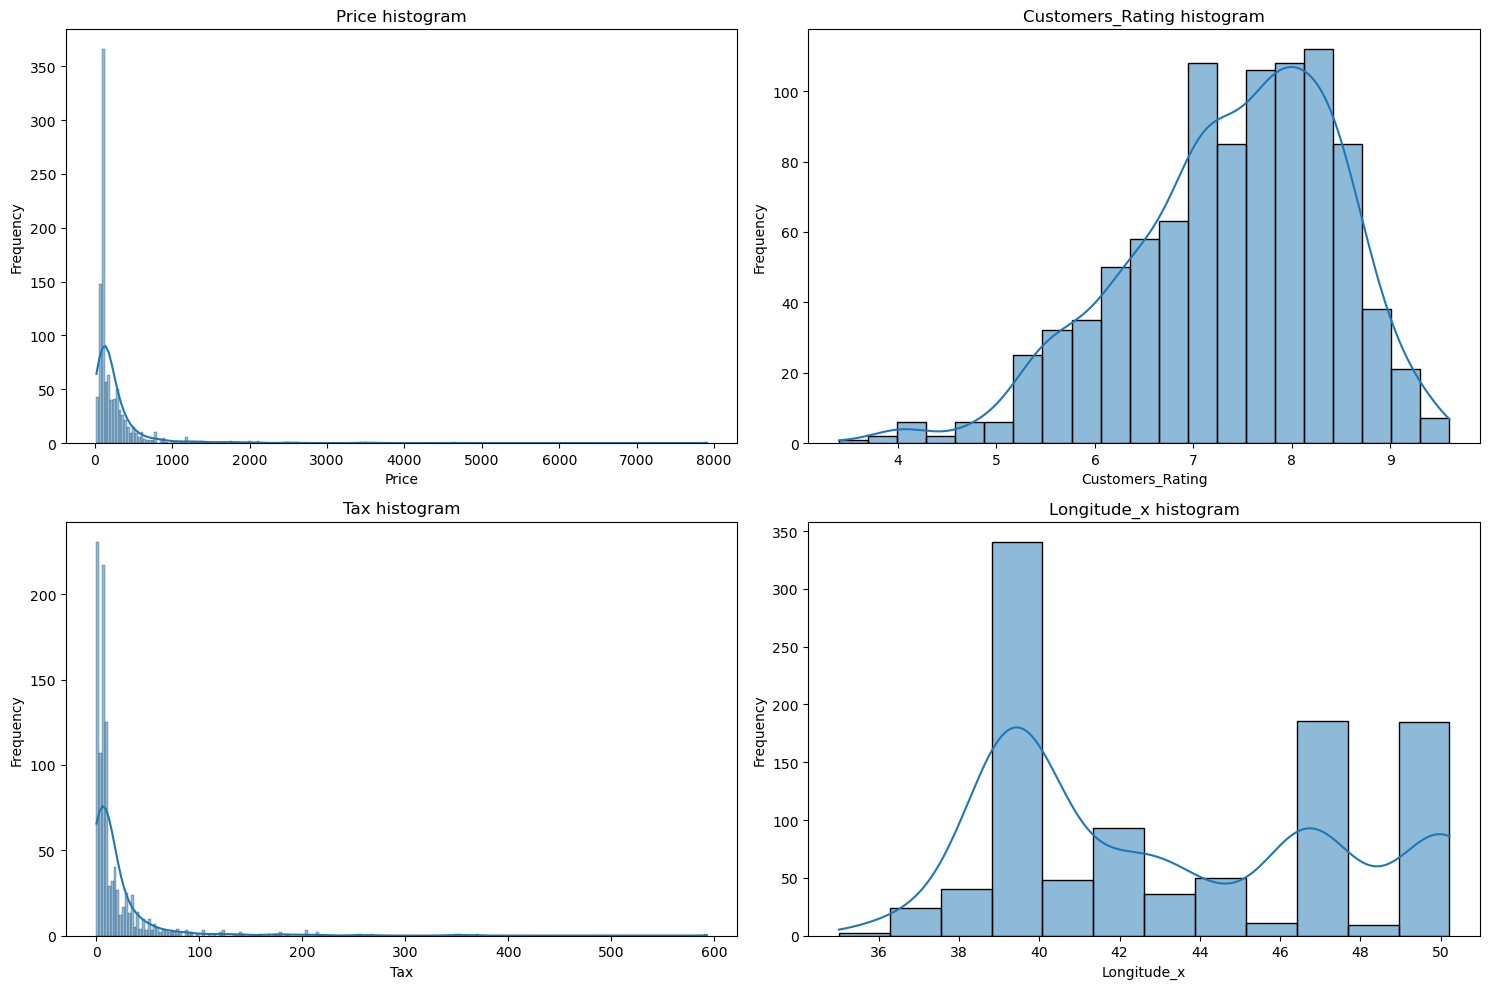

In [161]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.flatten(), numerical_types):
    sns.histplot(df[column], ax=ax, kde = True)
    ax.set_title(column + " histogram")
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [162]:
#customer rating mean in around 8

In [163]:
df['log_price'] = df['Price'].apply(lambda x: np.log(x))


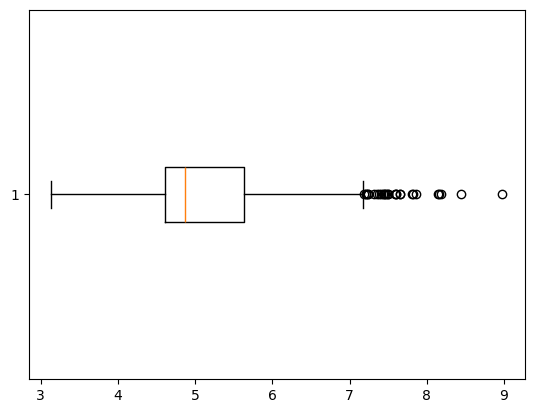

In [164]:
plt.boxplot(df['log_price'], vert = False)
plt.show()

In [165]:
# there are a lot of outliers for price

In [166]:
categories = ['num_beds', "Star_Rating", 'no_prepayment', 'Cancelation', 'Max_persons']

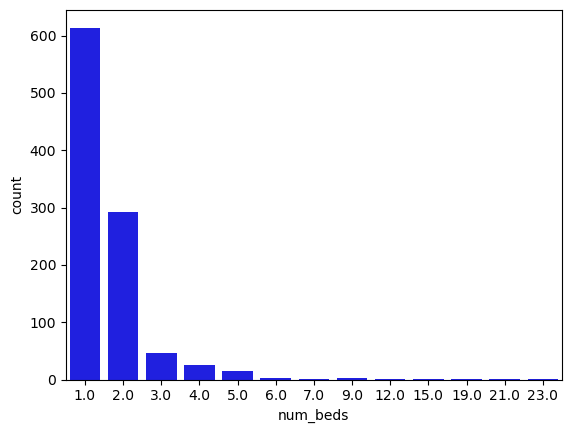

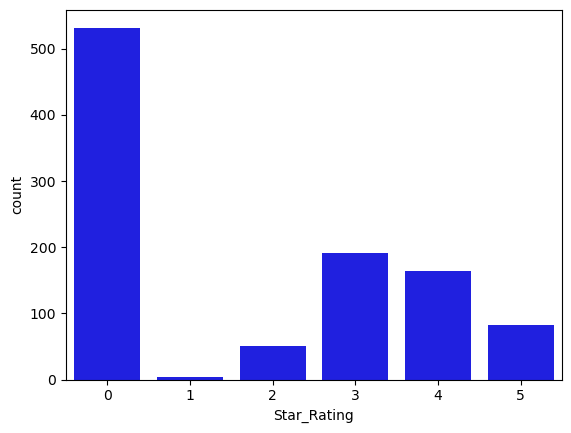

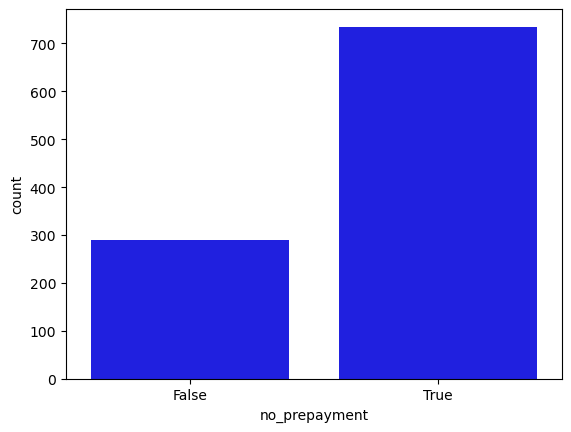

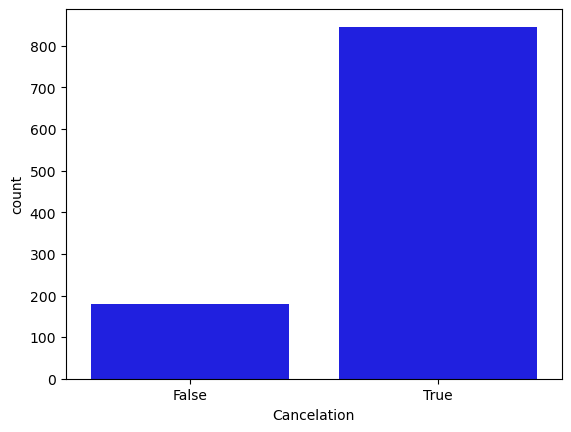

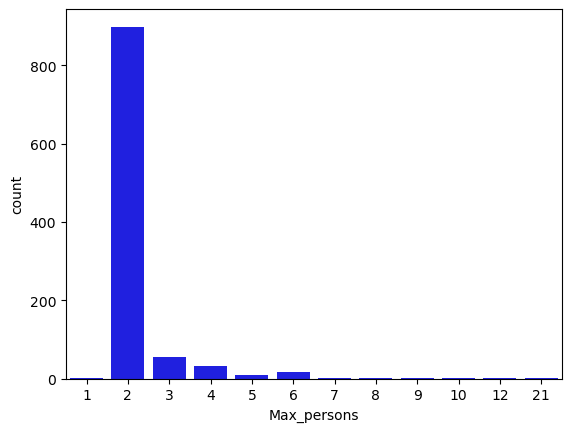

In [167]:
#for categorical columns construct countplots
for cat in categories:
    sns.countplot(x = cat, data = df, color = 'blue')
    plt.show()


In [168]:
numerical_cols = numerical_types+categories

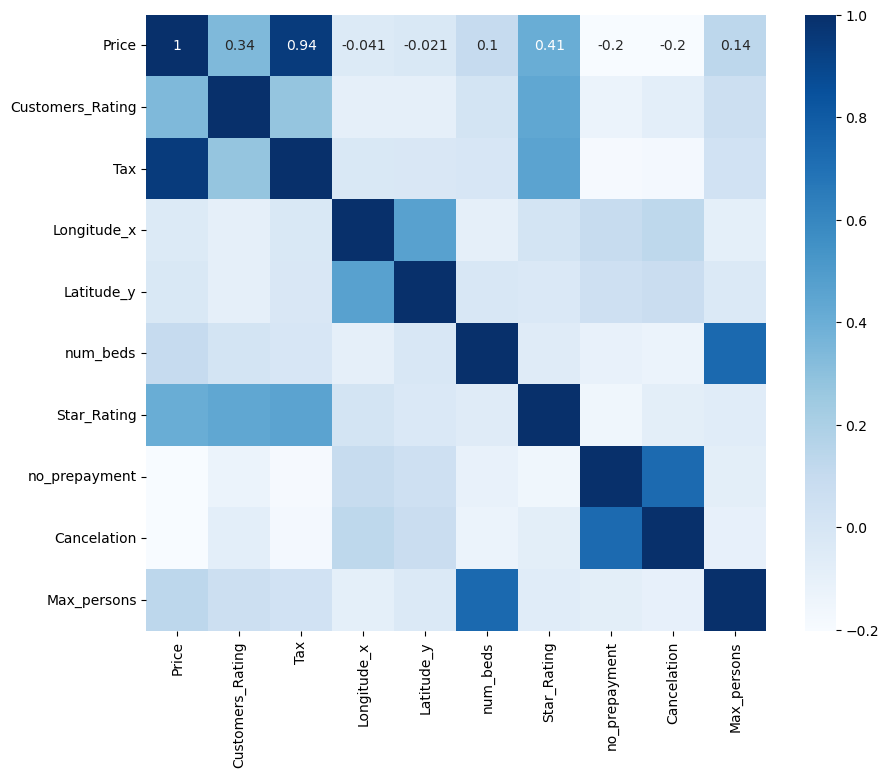

In [169]:
#correlation heatmap
plt.figure(figsize=(10, 8)) 
numerical_df = df[numerical_cols]
numerical_df.corr
sns.heatmap(numerical_df.corr(), annot = True, cmap='Blues')
plt.show()

<Axes: >

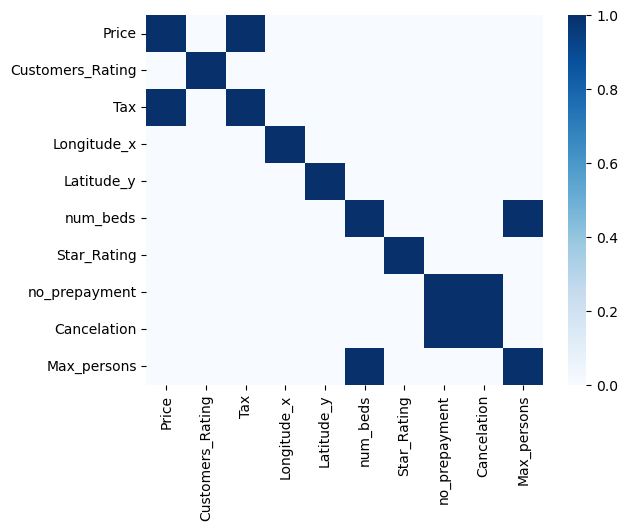

In [170]:
sns.heatmap(abs(numerical_df.corr())>0.5, cmap="Blues")

In [171]:
#stars and customer rating seems to have correlation with price, number of beds has correlation with max persons
#if there is no prepayment needed it is likely to have free cancellation


<BarContainer object of 10 artists>

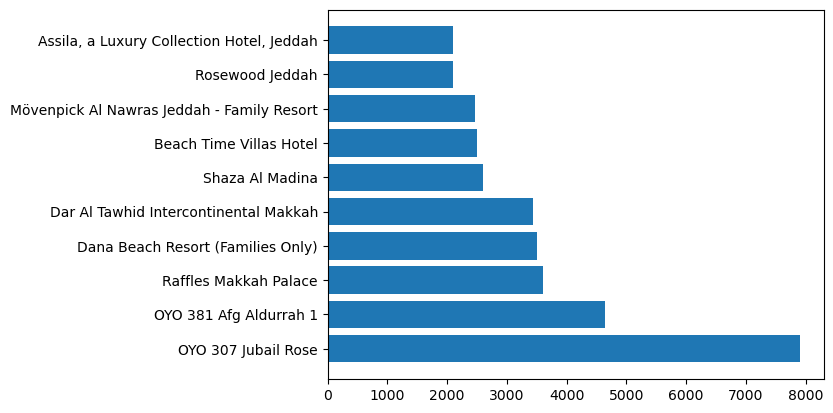

In [172]:
#plot top 10 expensive hotels 
df_sorted_price = df.sort_values('Price', ascending = False)
plt.barh(df_sorted_price['Name'].head(10), df_sorted_price["Price"].head(10))

In [173]:
df.to_csv('clean_data', index=False)

## Part 2: using Plotly

In [174]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [175]:
#group cities with less than 10 hotels in "other"
city_counts = df['City'].value_counts()

df['City_Group'] = df['City'].apply(lambda x: x if city_counts[x] > 10 else 'Other')

Scatter plot of hotel log_price vs customer rating

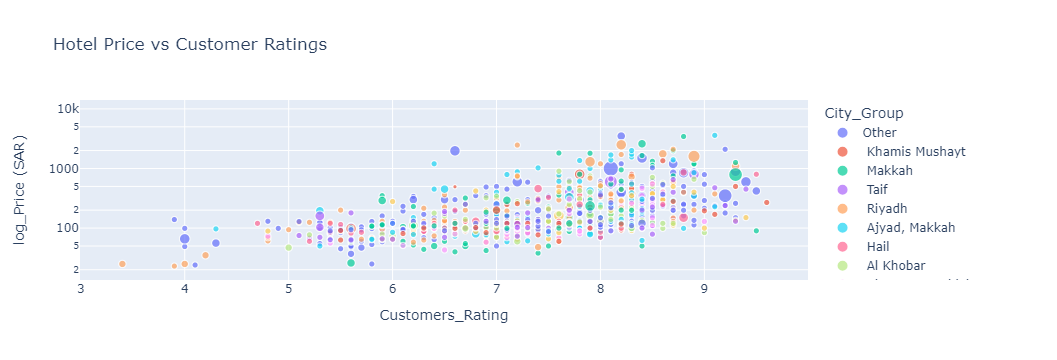

In [176]:
fig = px.scatter(df, x = 'Customers_Rating', 
                 y = "Price", 
                 size = "Max_persons", 
                 size_max = 20,
                 hover_name = "Name",
                 hover_data=['Type_of_room', "City"], 
                 color = "City_Group",
                 title='Hotel Price vs Customer Ratings',
                 labels={ 'Customer_Ratings': 'Customer Ratings', 'Price': 'log_Price (SAR)'},
                log_y = True)
fig.update_traces(hovertemplate='Hotel: %{hovertext}<br>Rating: %{x}<br>Price: %{y}<br>Room Type: %{customdata[0]}<br>City: %{customdata[1]}')
fig.show()

### Construct boxplots for log_price separated by cancelation option

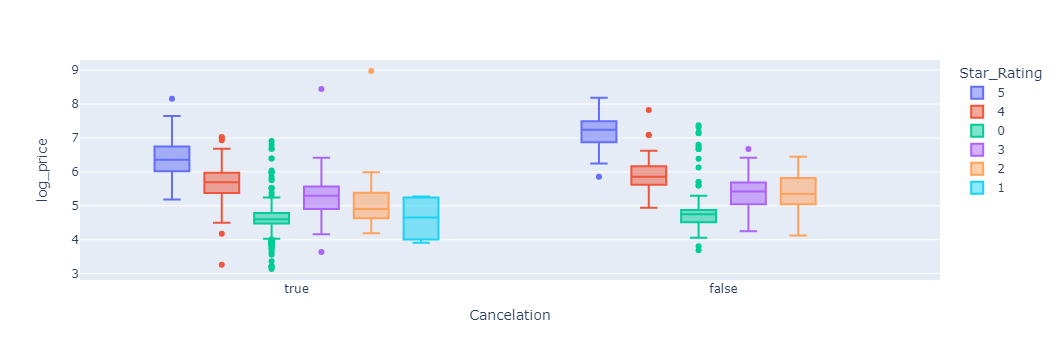

In [177]:
fig = px.box(df, x = "Cancelation", y = 'log_price', color = "Star_Rating",hover_data=['Name'])
fig.show()

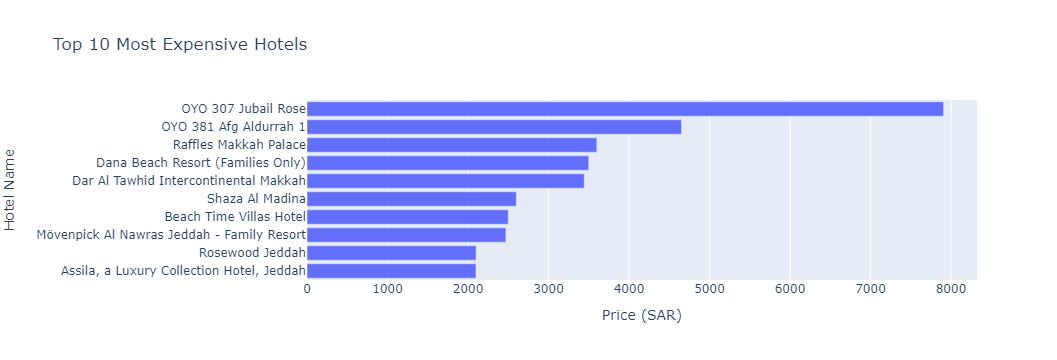

In [178]:
df_sorted_price = df.sort_values('Price', ascending=False)
fig = px.bar(df_sorted_price.head(10), 
             y='Name', 
             x='Price', 
             orientation='h', 
             hover_data = ["City", 'Star_Rating', "Type_of_room"],
             title='Top 10 Most Expensive Hotels',
             labels={'Price': 'Price (SAR)', 'Name': 'Hotel Name'},
            )
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

## Using Plotly express scatter_mapbox to visualize hotels on the map

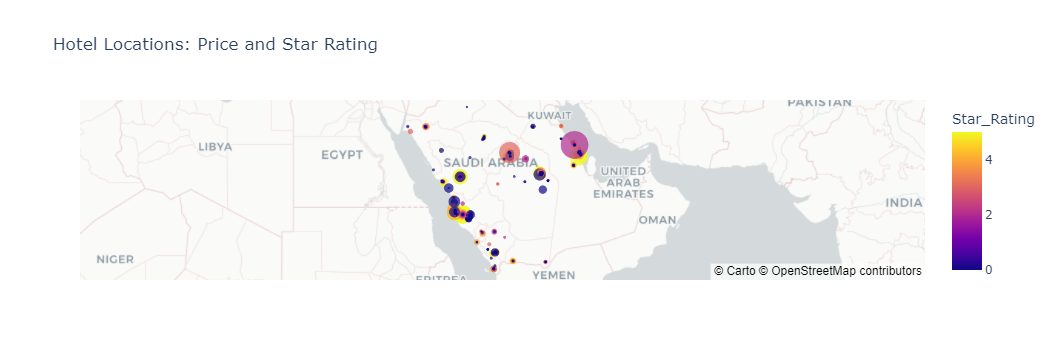

In [179]:
fig = px.scatter_mapbox(df, 
                        lat="Latitude_y", 
                        lon="Longitude_x", 
                        color="Star_Rating", 
                        size="Price",
                        hover_name = "Name",
                        hover_data = ['Type_of_room', 'no_prepayment', 'Cancelation', 'Max_persons', 'Tax', 'Price'] ,
                        size_max=20, 
                        zoom = 3,
                        mapbox_style="carto-positron",
                        title="Hotel Locations: Price and Star Rating")
fig.update_traces(
    hovertemplate='Hotel: %{hovertext}<br>Room type: %{customdata[0]}<br>No prepayment: %{customdata[1]}<br>Free cancellation: %{customdata[2]}<br>Maximum persons: %{customdata[3]}<br>Taxes: %{customdata[4]}<br>Price: %{customdata[5]}')
fig.show()

### Histograms for numerical columns. 
You can select desired column from the dropdown.

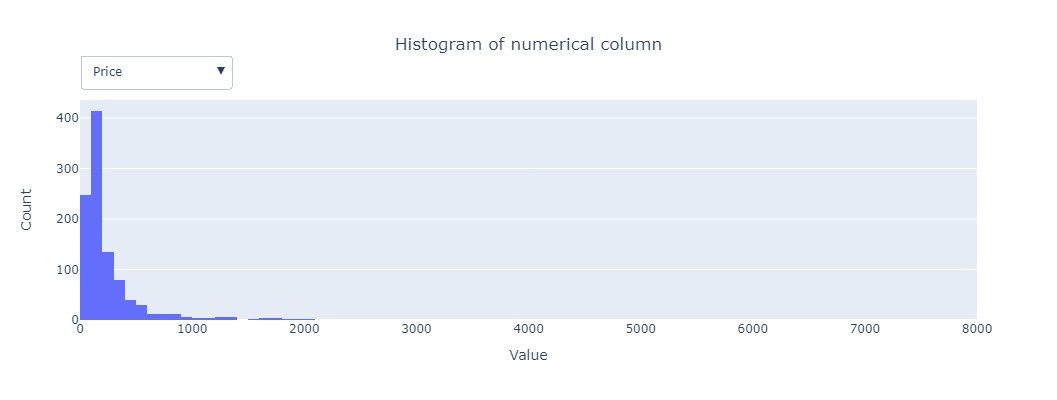

In [180]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df[numerical_cols[0]],
                            name=numerical_cols[0]))
buttons = []

for col in numerical_cols:
    buttons.append(dict(method='restyle',
                        label=col,
                        visible=True,
                        args=[{'x': [df[col]], 'name': col}]
                        ))
fig.update_layout(
    updatemenus=[
        dict(buttons=buttons,
             direction="down",
             pad={"r": 10, "t": 10},
             showactive=True,
             x=0,
             xanchor="left",
             y=1.25,
             yanchor="top")
    ]
)

fig.update_layout(title_text='Histogram of numerical column',
                  title_x = 0.5,
                  xaxis_title_text='Value',
                  yaxis_title_text='Count',  
                  height=400, width = 700)

fig.show()

### Boxplots for log_price for each category

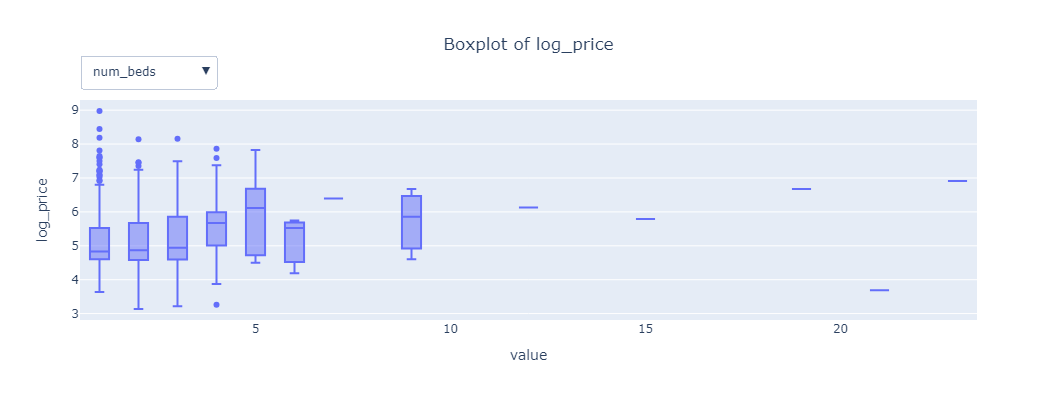

In [181]:
fig = go.Figure()
fig.add_trace(go.Box( x = df["num_beds"], y = df['log_price'], name = "num_beds"))
buttons =[]
for col in categories:
    buttons.append(dict(method='restyle',
                        label=col,
                        visible=True,
                        args=[{'x': [df[col]],  'name': col}]
                        ))
fig.update_layout(
    updatemenus=[
        dict(buttons=buttons,
             direction="down",
             pad={"r": 10, "t": 10},
             showactive=True,
             x=0,
             xanchor="left",
             y=1.25,
             yanchor="top")
    ]
)

fig.update_layout(title_text='Boxplot of log_price',
                  title_x = 0.5,
                  xaxis_title_text="value",
                  yaxis_title_text='log_price',  
                  height=400, width = 700)    
fig.show()

In [182]:

star_rating_counts = df['Star_Rating'].value_counts()
star_rating_counts

Star_Rating
0    532
3    191
4    164
5     83
2     51
1      4
Name: count, dtype: int64

### Pie chart for hotels star ratings

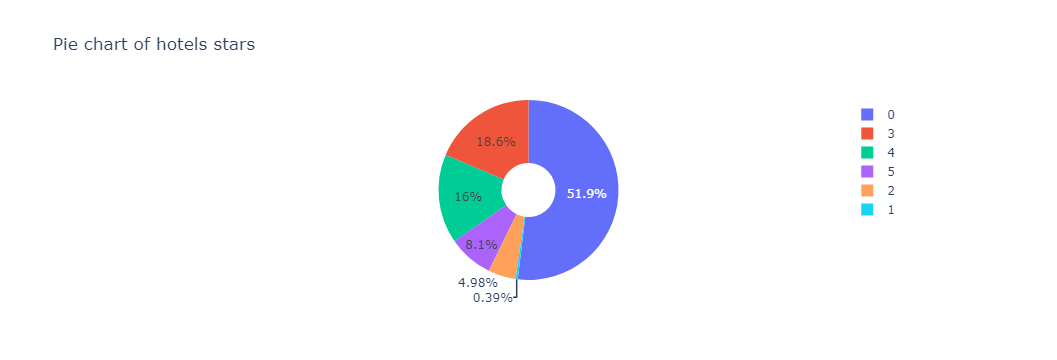

In [183]:

data = go.Pie(labels = star_rating_counts.index, values = star_rating_counts.values, hole = 0.3)
layout = {"title": "Pie chart of hotels stars"}
fig = go.Figure(data, layout = layout)
fig.show()

#### Top-10 best service cities in Saudi Arabia

In [191]:
average_ratings = df.groupby('City')['Customers_Rating'].mean().sort_values(ascending=False)[:10]

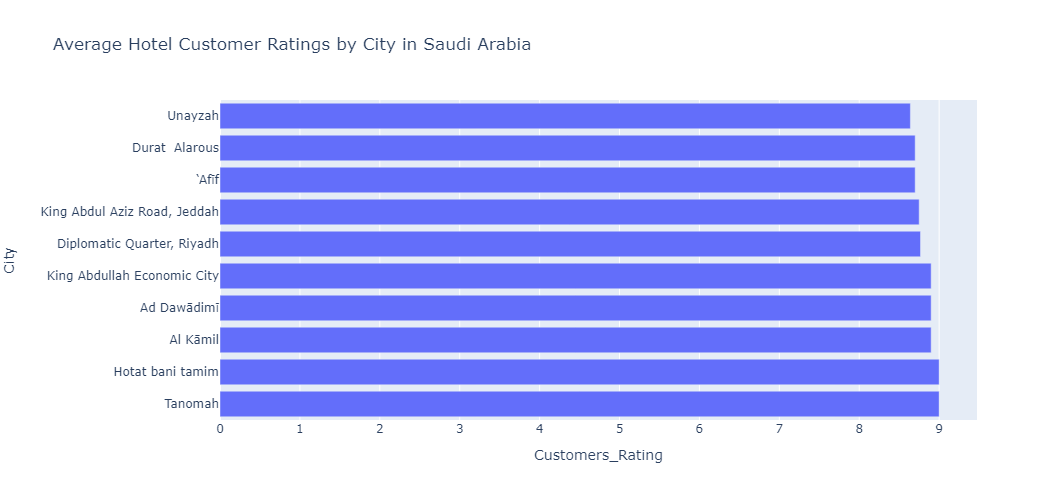

In [200]:
average_ratings_df = average_ratings.reset_index()

# Create a bar chart
fig = px.bar(average_ratings_df, y='City', x='Customers_Rating',
             title='Average Hotel Customer Ratings by City in Saudi Arabia',
             labels={'Customer_Rating': 'Average Rating'},
             orientation='h',
             height=500)

fig.show()